**MAJOR PROJECT- FACTOR AFFECTING CAMPUS PLACEMENT**
*MAINLY FOR ACCURACY*
NAME-ANUSHKA GARG-062,
     MEHAK 010



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/placement.csv')

In [ ]:
## Check detail description about numeric variables 
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
## Check data type and shape of every column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [ ]:
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [ ]:
df_placed = df.dropna(how="any")
df_placed.shape

(148, 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


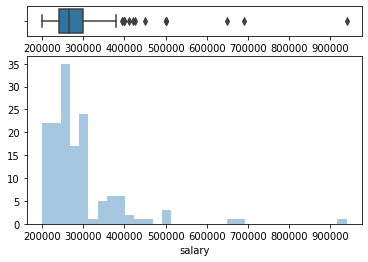

In [ ]:
# ### Salary distribution through box-whiskers plot & Histogram

## Box whiskers plot & histogram on the same window 
## Split the plotting window into 2 parts

f, (ax_box, ax_hist)= plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
## Add and create  box plot
sns.boxplot(df_placed["salary"], ax=ax_box)

sns.distplot(df_placed["salary"], ax=ax_hist, kde=False)
plt.show()


In [ ]:

## Remove outliers from salary column
df_placed = df_placed[df_placed['salary'] < 650000]

In [ ]:
## Find correlation between numeric variables in dataframe

numeric_data = df_placed.select_dtypes(exclude = [object])
numeric_data.shape

corr_matrix = numeric_data.corr()
corr_matrix


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.093419,-0.245538,-0.108449,0.038152,-0.084267,-0.000088
ssc_p,-0.093419,1.000000,0.300439,0.382108,0.327470,0.437202,0.144082
hsc_p,-0.245538,0.300439,1.000000,0.185876,0.264438,0.313767,0.066895
degree_p,-0.108449,0.382108,0.185876,1.000000,0.200420,0.490928,0.028069
etest_p,0.038152,0.327470,0.264438,0.200420,1.000000,0.275051,0.233801
mba_p,-0.084267,0.437202,0.313767,0.490928,0.275051,1.000000,0.198285
salary,-0.000088,0.144082,0.066895,0.028069,0.233801,0.198285,1.000000


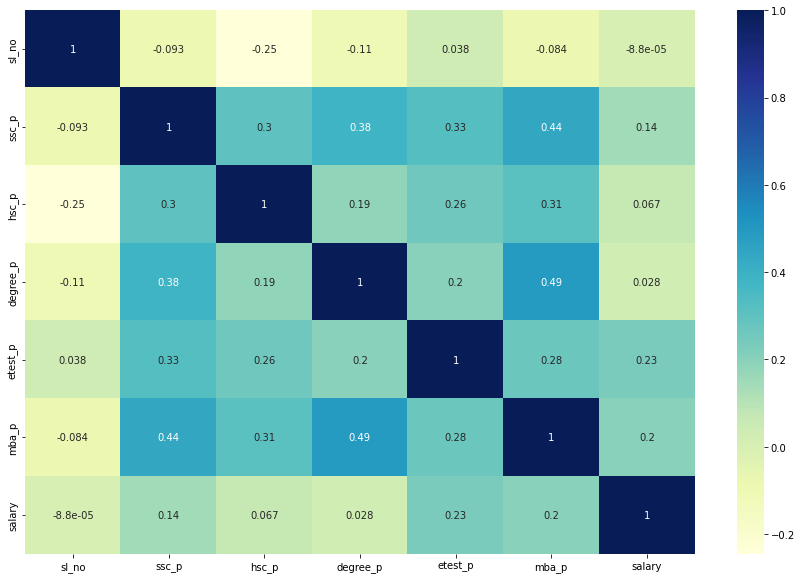

In [ ]:
# Now, show the correlation matrix into heatmap for better understanding and visualization
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()


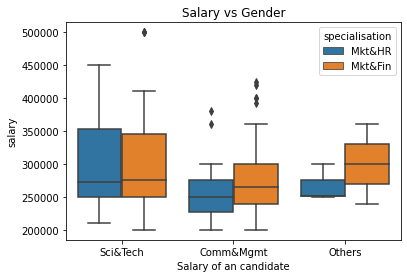

In [ ]:
## Box and whiskers plot is very useful to find relationship between numerical & categorical variable.

sns.boxplot(x=df_placed['degree_t'], y = df_placed['salary'], hue='specialisation', data=df_placed)
plt.title("Salary vs Gender")
plt.xlabel("Gender of an candidate")
plt.xlabel("Salary of an candidate")
plt.show()

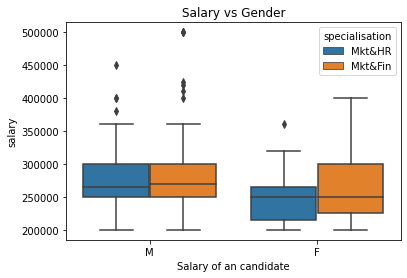

In [ ]:
## Box and whiskers plot is very useful to find relationship between numerical & categorical variable.

sns.boxplot(x=df_placed['gender'], y = df_placed['salary'], hue='specialisation', data=df_placed)
plt.title("Salary vs Gender")
plt.xlabel("Gender of an candidate")
plt.xlabel("Salary of an candidate")
plt.show()

In [ ]:
## Model Development :-  Salary Prediction
## Now, build a Linear Regression and Random Forest Model on placed dataframe only.

In [ ]:

df_predict = df_placed.copy()
df_predict.drop(columns=['status','degree_p'], axis=1, inplace=True)


In [ ]:
## Converting categorical variables to dummy variables
##df_predict=pd.get_dummies(df_placed, drop_first=True)
df_predict = pd.get_dummies(df_predict, columns=['gender', 'ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'])
df_predict.head(3)

,sl_no,ssc_p,hsc_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
0,1,67.00,91.00,55.0,58.80,270000.0,0,1,0,1,...,0,1,0,0,0,1,1,0,0,1
1,2,79.33,78.33,86.5,66.28,200000.0,0,1,1,0,...,0,0,1,0,0,1,0,1,1,0
2,3,65.00,68.00,75.0,57.80,250000.0,0,1,1,0,...,1,0,0,1,0,0,1,0,1,0


In [ ]:
## Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
## Separating input and output features
x1 = df_predict.drop(['salary'], axis='columns', inplace=False)
y1 = df_predict['salary']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


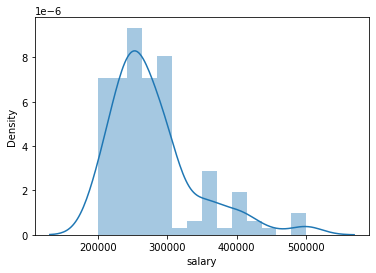

In [ ]:
## FInd skewness of salary column. 

#SalePrice
sns.distplot(df_predict['salary'])

In [ ]:
#skewness
print("The skewness of SalePrice is {}".format(df_placed['salary'].skew()))


The skewness of SalePrice is 3.569747199871106


In [ ]:
## Splitting data into test and train to fit model & predict. Train set contains 60% data because test_size =0.4 and random state is a predefined algorithm its called pseudo random number generato

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.40, random_state = 5)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(87, 21) (58, 21) (87,) (58,)


In [ ]:
from logging import logMultiprocessing

## LINEAR REGRESSION WITH PLACED DATA
## Setting intercept as true
lm = LinearRegression(fit_intercept =True)

## MODEL
model_lin1 = lm.fit(x_train, y_train)

In [ ]:
ypred_train = lm.predict(x_train)
ypred_test = lm.predict(x_test)

In [ ]:
## Predicting model on test set
ypred_test = lm.predict(x_test)

In [ ]:
ypred_train = lm.predict(x_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,f1_score

In [ ]:
## Check the difference between the actual value and predicted value.

df1 = pd.DataFrame({'Actual': y_test, 'Predicted':ypred_test})
df1.head(10)

,Actual,Predicted
196,250000.0,288630.990017
71,240000.0,337955.245759
20,265000.0,263308.953701
73,218000.0,273007.127625
133,250000.0,238017.700516
77,500000.0,268436.176727
59,265000.0,286596.421014
211,275000.0,312117.960714
35,300000.0,229934.870140
32,278000.0,209595.996163


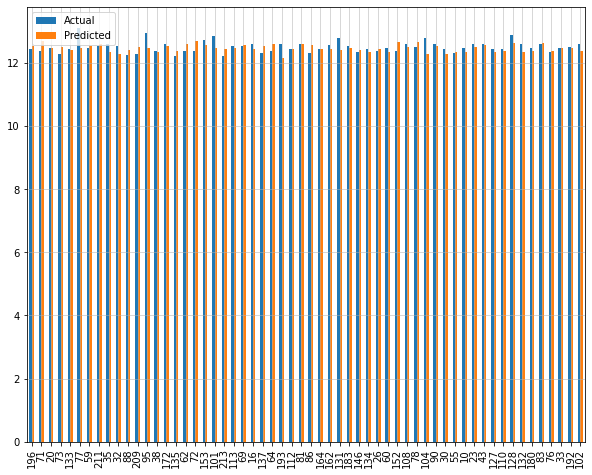

In [ ]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()


In [ ]:
## MODEL PARAMETERS
rf = RandomForestRegressor(n_estimators = 100, max_features='auto', max_depth=100, min_samples_split=10, min_samples_leaf=4, random_state=1)

## MODEL
model_rf1 =rf.fit(x_train, y_train)

## Predicting model on test set
salary_predictions_rf1 = rf.predict(x_test)


In [ ]:
## Check the difference between the actual value and predicted value.
df2 = pd.DataFrame({'Actual': y_test, 'Predicted':salary_predictions_rf1})
df2.head(10)

,Actual,Predicted
196,250000.0,287087.619663
71,240000.0,320507.164495
20,265000.0,256055.337243
73,218000.0,279471.041651
133,250000.0,251856.844296
77,500000.0,279383.002167
59,265000.0,274644.122682
211,275000.0,305508.814588
35,300000.0,247819.626352
32,278000.0,253408.906494


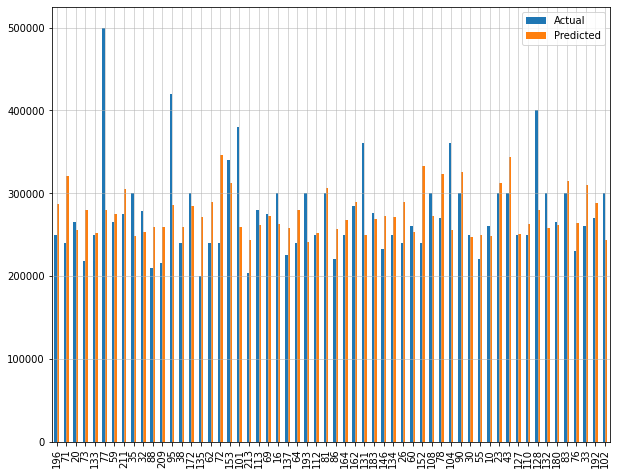

In [ ]:
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()